In [1]:
import pandas as pd
import os

In [4]:
method = 'kimto1'
categories = 'o2o'
horizon = 1
train_days = 30
val_days = 5
model_name = 'sac_base'
env_name = 'hedge011'
code = 'IM'
direction = 'long'

In [5]:
dirs = os.path.join(
        './record', 'agent', method, 'g_instruments', 'rolling',
        'normal_factors3',str(train_days), str(val_days),
          "{0}_{1}".format(categories,
                                            str(horizon)),
        "{0}_{1}_{2}_{3}".format(model_name, env_name,
                                 code, str(direction)))

In [6]:
res = []
for file in os.listdir(dirs):
    filename = os.path.join(dirs, file)
    ext = filename.split('.')
    #print(ext)
    if ext[-1] != 'feather':
        continue
    print(filename)
    dt = pd.read_feather(filename)
    dt = dt.set_index('trade_time')
    name = filename.split('/')[-1].split('.')[0]
    res.append({'dt':dt,'name':name})

FileNotFoundError: [Errno 2] No such file or directory: './record/agent/kimto1/g_instruments/rolling/normal_factors3/30/5/o2o_1/sac_base_hedge011_IM_long'

In [5]:
res1 = []
for dm in res:
    ds = dm['dt']
    name = dm['name']
    ds = ds.reset_index()
    ds['trade_date'] = pd.to_datetime(ds['trade_time']).dt.strftime('%Y-%m-%d')
    m1 = ds.groupby('trade_date')['profit'].sum().reset_index()
    m1 = m1.set_index('trade_date')
    m1.columns = [name.split('_')[1]]
    res1.append(m1)
    

In [6]:
m1#.columns = ['dd']

,best
trade_date,
2025-01-21,-6102.507886
2025-01-22,-3082.369545
2025-01-23,10757.995068
2025-01-24,27268.700947
2025-01-27,-11835.850271
2025-02-05,15482.480882


<Axes: xlabel='trade_date'>

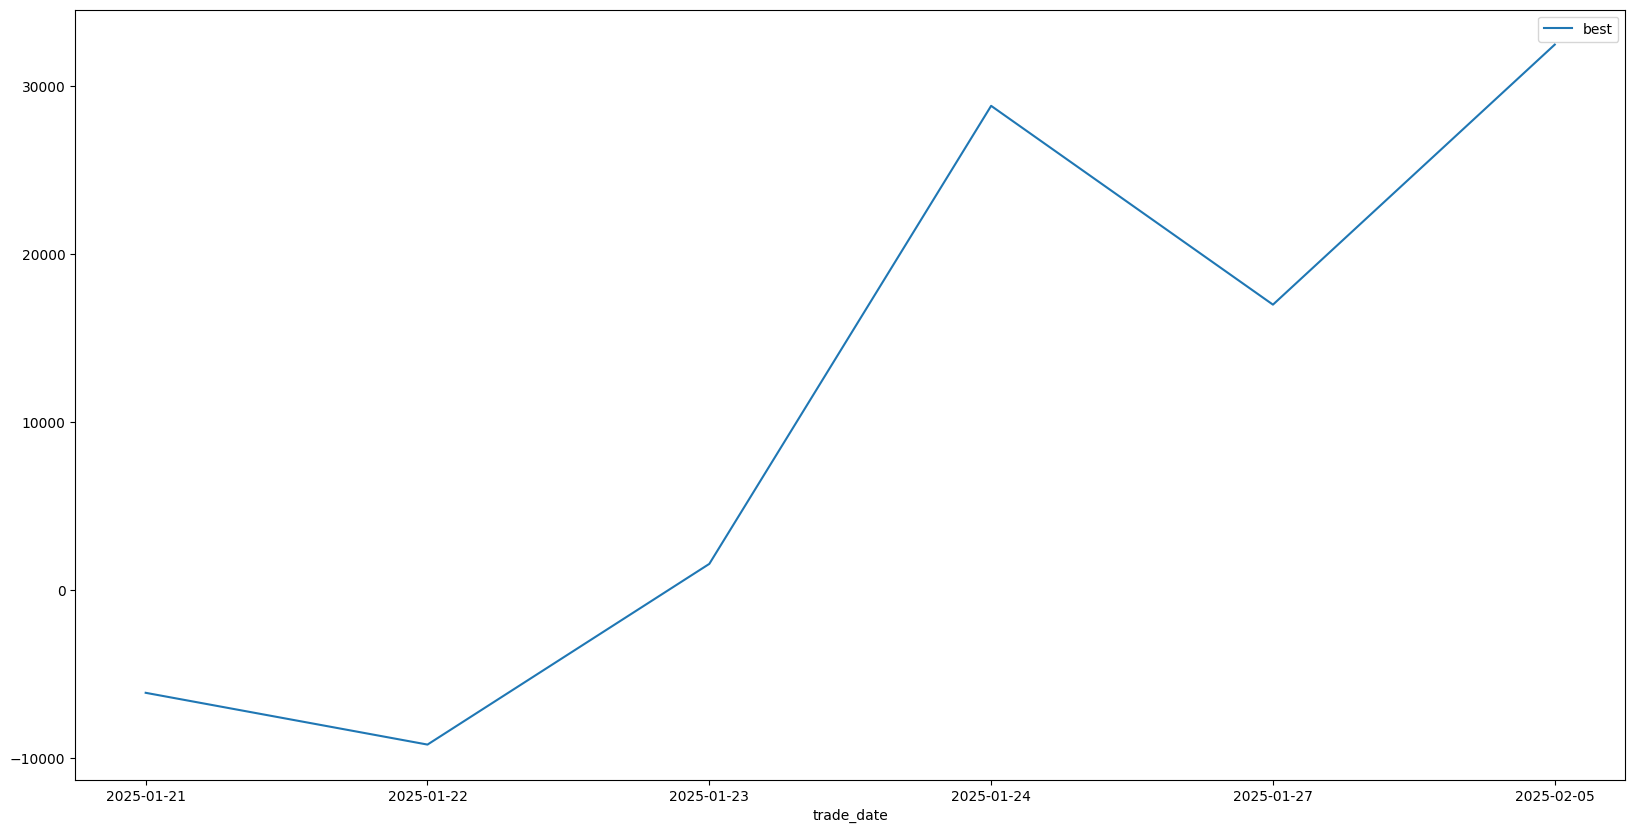

In [8]:
pd.concat(res1, axis=1).cumsum().plot(figsize=(20,10))